# Jerk Simulation

L'objectif est de dimensionner un filtre à Jerk.

Les critères sont les suivants : 

- Le générateur de trajectoire génère des incréments entiers de positions
- Ces incréments doivent être filtrés par un filtre à Jerk où le temps de filtrage est paramétrable. Grosso modo, un filtre à Jerk de 10 ms va retarder le signal de 10 ms.
- Le filtre à Jerk doit être stable et ne pas introduire de perte d'information.
- Il doit utiliser le moins de mémoire possible et le moins de ressources de calcul possible.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Paramètres

In [ ]:
dt   = 1.0 / 5_000 # période d'échantionnage


## Génération d'un signal de référence

In [ ]:
def generate_signal(segments):
    signal = []
    for (prev_val, (duration, value)) in zip([segments[0][1]] + [v for _, v in segments[:-1]], segments):
        ramp = (np.full(duration, value, dtype=float) if value == prev_val
                else np.linspace(prev_val, value, duration, dtype=float))
        signal.append(ramp)
    return np.concatenate(signal)

In [10]:
signal = generate_signal([(200, 20), (100, 50), (20, 50), (50, 80), (100, 80), (100, 20), (200, 20) ])

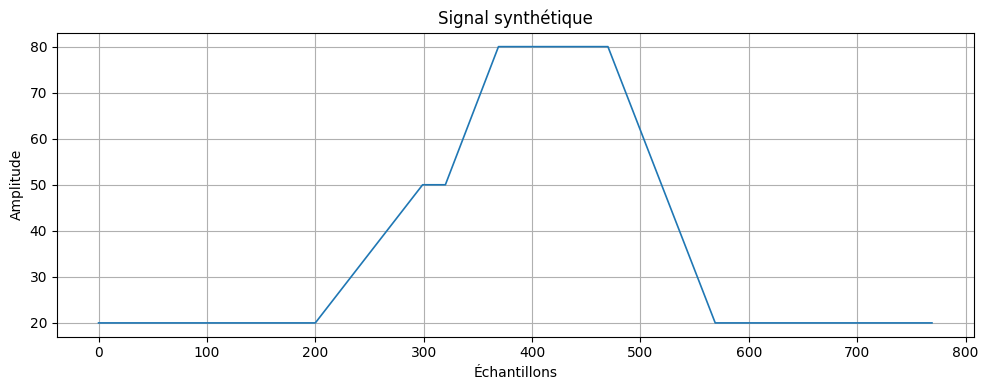

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(signal, linewidth=1.2)
plt.title("Signal synthétique")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

## Algorithme de filtrage

In [ ]:
class JerkFilter:
    def __init__(self, dt: float):
        self.dt = dt
        self.alpha = 0.0
        self.reset()

    def reset(self):
        self.err = 0.0 # reliquat signé
        self.y_old = 0.0

    def set_alpha(self, tau = 10e-3):
        self.alpha = self.dt / tau if tau > 0.0 else 0.0

    def update(self, sample: int):
        if self.alpha == 0.0:
            return (sample, sample)

        x_eff = sample + self.err # restitution du résidu
        y = self.y_old + self.alpha * (x_eff - self.y_old)
        self.y_old = y
        iy = int(y)  # quantification entière
        self.err = y - iy # nouveau résidu
        return (iy, y)


## Exemples

### Simple rampe

In [37]:
tau = 5e-3
y = generate_signal([(50, 0), (200, 100), (200, 0), (300, 0)])

jerk = JerkFilter()
jerk.set_alpha(tau)

u = [jerk.update(sample) for sample in y]

ui = [i for i, _ in u]
uf = [f for _, f in u]

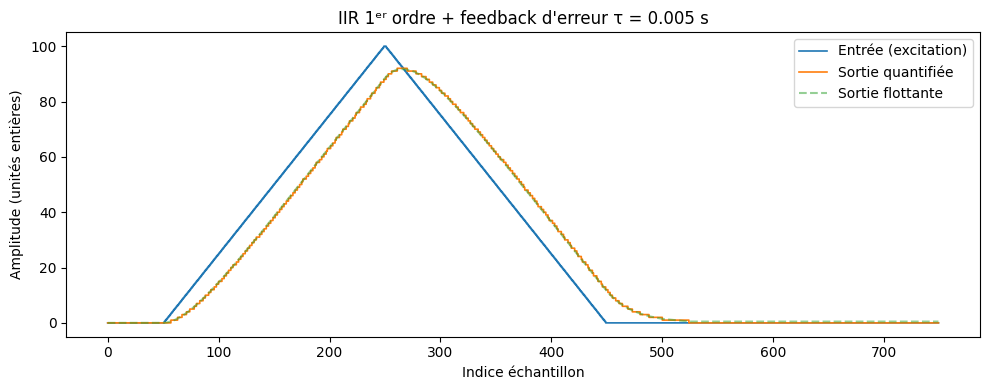

In [38]:
t = np.arange(len(y))
plt.figure(figsize=(10, 4))
plt.step(t, y,  where="post", label="Entrée (excitation)", linewidth=1.2)
plt.step(t, ui,   where="post", label="Sortie quantifiée",   linewidth=1.2)
plt.plot(t, uf, "--",         label="Sortie flottante",    alpha=0.5)
plt.title(f"IIR 1ᵉʳ ordre + feedback d'erreur τ = {tau:.3f} s")
plt.xlabel("Indice échantillon")
plt.ylabel("Amplitude (unités entières)")
plt.legend()
plt.tight_layout()
plt.show()

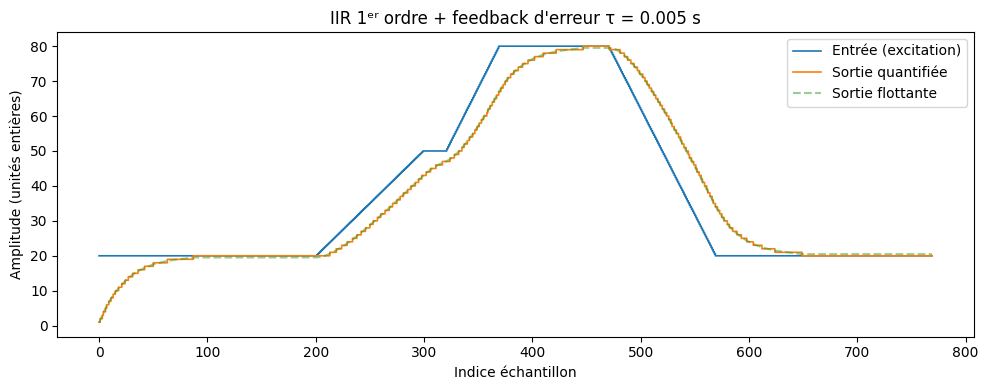

In [39]:
tau = 5e-3
y = generate_signal([(200, 20), (100, 50), (20, 50), (50, 80), (100, 80), (100, 20), (200, 20) ])

jerk = JerkFilter()
jerk.set_alpha(tau)

u = [jerk.update(sample) for sample in y]

ui = [i for i, _ in u]
uf = [f for _, f in u]

t = np.arange(len(y))
plt.figure(figsize=(10, 4))
plt.step(t, y,  where="post", label="Entrée (excitation)", linewidth=1.2)
plt.step(t, ui,   where="post", label="Sortie quantifiée",   linewidth=1.2)
plt.plot(t, uf, "--",         label="Sortie flottante",    alpha=0.5)
plt.title(f"IIR 1ᵉʳ ordre + feedback d'erreur τ = {tau:.3f} s")
plt.xlabel("Indice échantillon")
plt.ylabel("Amplitude (unités entières)")
plt.legend()
plt.tight_layout()
plt.show()

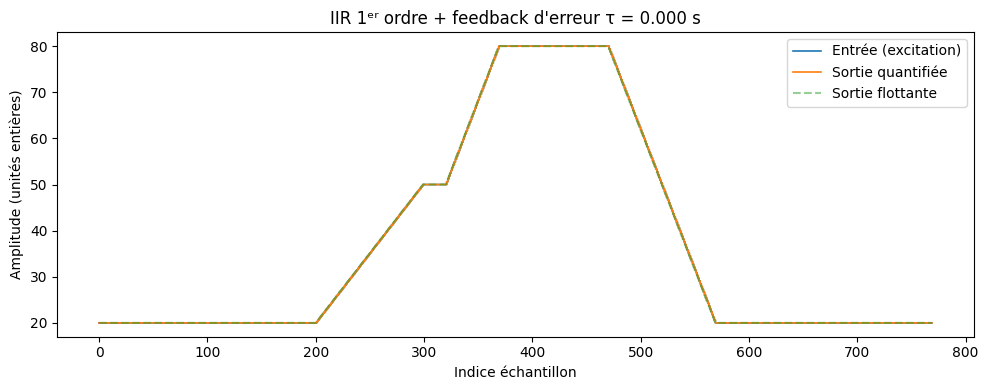

In [45]:
tau = 0
y = generate_signal([(200, 20), (100, 50), (20, 50), (50, 80), (100, 80), (100, 20), (200, 20) ])

jerk = JerkFilter()
jerk.set_alpha(tau)

u = [jerk.update(sample) for sample in y]

ui = [i for i, _ in u]
uf = [f for _, f in u]

t = np.arange(len(y))
plt.figure(figsize=(10, 4))
plt.step(t, y,  where="post", label="Entrée (excitation)", linewidth=1.2)
plt.step(t, ui,   where="post", label="Sortie quantifiée",   linewidth=1.2)
plt.plot(t, uf, "--",         label="Sortie flottante",    alpha=0.5)
plt.title(f"IIR 1ᵉʳ ordre + feedback d'erreur τ = {tau:.3f} s")
plt.xlabel("Indice échantillon")
plt.ylabel("Amplitude (unités entières)")
plt.legend()
plt.tight_layout()
plt.show()